# Intervalo de Confiança - Paredão BBB

Este notebook tem como objetivo definir um intervalo de confiança dos votos de cada participante no paredão do BBB considerando múltiplas fontes de enquetes parciais.

## • Configuração Prévia

Configurações para execução do script

→ Módulos externos:

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sb

import numpy as np

→ Módulos locais:

In [2]:
from logic.enquete_data_list import EnqueteDataList

from logic.bootstrapping_handler import BootstrappingHandler

from logic.confidence_interval_chart import ConfidenceIntervalChart

from logic.data_loader import DataLoader

from logic.paredao import Paredao

→ Magic Words:

In [3]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

→ Chart's Style:

In [4]:
plt.style.use('seaborn')

## • Dados

Obtendo e padronizando os dados.

→ Pré-configuração dos objetos:

In [5]:
#TODO: Defina o nome dos participantes

paredao = Paredao('Luciano', 'Naiara', 'Natalia')

In [6]:
enquete_data_list = EnqueteDataList()

In [7]:
participantes_paredao = paredao.get_participantes()

→ Coletando os dados:

In [8]:
#TODO: Defina os dados das enquetes parciais

temp_dl = DataLoader('EnqueteBBB22', paredao)

temp_dl.set_manual_entries(
    num_participante_1 = int(561 * 0.697),
    num_participante_2 = int(561 * 0.146),
    num_participante_3 = int(561 * 0.157) )

enquete_data_list.append(temp_dl.get())

In [9]:
temp_dl = DataLoader('RamonJunior', paredao)

temp_dl.set_manual_entries(
    num_participante_1 = int(190 * 0.684),
    num_participante_2 = int(190 * 0.174),
    num_participante_3 = int(190 * 0.142))

enquete_data_list.append(temp_dl.get())

In [10]:
temp_dl = DataLoader('DearlyBBB', paredao)

temp_dl.set_manual_entries(
    num_participante_1 = int(151* 0.755),
    num_participante_2 = int(151* 0.179),
    num_participante_3 = int(151* 0.066))

enquete_data_list.append(temp_dl.get())

In [11]:
temp_dl = DataLoader('UOL', paredao)

temp_dl.set_manual_entries(
    num_participante_1 = int(93966 * 0.4176),
    num_participante_2 = int(93966 * 0.3272),
    num_participante_3 = int(93966 * 0.2551))

enquete_data_list.append(temp_dl.get(max_samples = 2000))

In [12]:
temp_dl = DataLoader('CanalEspiadinha', paredao)

temp_dl.set_manual_entries(
    num_participante_1 = int(66090 * 0.64),
    num_participante_2 = int(66090 * 0.24),
    num_participante_3 = int(66090 * 0.12))

enquete_data_list.append(temp_dl.get(max_samples = 2000))

In [13]:
temp_dl = DataLoader('FolhaSP', paredao)

temp_dl.set_manual_entries(
    num_participante_1 = int(7193 * 0.38),
    num_participante_2 = int(7193 * 0.3),
    num_participante_3 = int(7193 * 0.32))

enquete_data_list.append(temp_dl.get(max_samples = 2000))

In [14]:
temp_dl = DataLoader('Extra', paredao)

temp_dl.set_manual_entries(
    num_participante_1 = int(2798 * 0.55),
    num_participante_2 = int(2798 * 0.24),
    num_participante_3 = int(2798 * 0.21))

enquete_data_list.append(temp_dl.get(max_samples = 2000))

→ DataFrame:

In [15]:
enquete_df = pd.DataFrame(enquete_data_list.get())

## • Avaliando a qualidade e estrutura

In [16]:
enquete_df.head()

,Luciano,Naiara,Natalia,Fonte
0,True,False,False,EnqueteBBB22
1,True,False,False,EnqueteBBB22
2,True,False,False,EnqueteBBB22
3,True,False,False,EnqueteBBB22
4,True,False,False,EnqueteBBB22


In [17]:
enquete_df.sample(10)

,Luciano,Naiara,Natalia,Fonte
991,True,False,False,UOL
7813,True,False,False,Extra
7950,False,True,False,Extra
8046,True,False,False,Extra
8677,True,False,False,Extra
1003,False,True,False,UOL
2407,True,False,False,UOL
5112,True,False,False,FolhaSP
5536,False,False,True,FolhaSP
1301,False,True,False,UOL


In [18]:
enquete_df.describe()

,Luciano,Naiara,Natalia,Fonte
count,8898,8898,8898,8898
unique,2,2,2,7
top,True,False,False,FolhaSP
freq,4540,6493,6945,2000


In [19]:
enquete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8898 entries, 0 to 8897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Luciano  8898 non-null   bool  
 1   Naiara   8898 non-null   bool  
 2   Natalia  8898 non-null   bool  
 3   Fonte    8898 non-null   object
dtypes: bool(3), object(1)
memory usage: 95.7+ KB


→ Análise da distribuição das fontes:

Deve-se haver uma boa distribuição das fontes para haver dados com menos viés.

O gráfico ilustra os 5 conjuntos de dados mais principais.

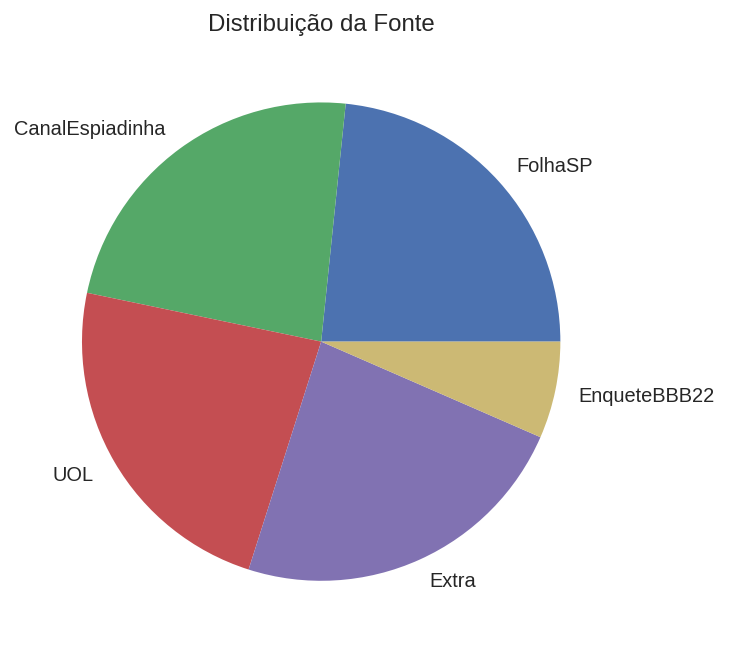

In [20]:
#TODO: Busque balancear o número de samples de cada fonte

enquete_df['Fonte'].value_counts()[:5].plot(kind = 'pie');

plt.title('Distribuição da Fonte');

plt.ylabel('');

plt.xlabel('');

## • Análise do intervalo de confiança

→ Executando o Bootstrapping para obter a distribuição das médias de cada participante.

In [21]:
bootstrapping_handler = BootstrappingHandler()

bootstrapping_handler.from_data_frame(
    enquete_df,
    participantes_paredao[0],
    300
)

samples_participante_1 = bootstrapping_handler.get_samples()

In [22]:
bootstrapping_handler = BootstrappingHandler()

bootstrapping_handler.from_data_frame(
    enquete_df,
    participantes_paredao[1],
    300
)

samples_participante_2 = bootstrapping_handler.get_samples()

In [23]:
bootstrapping_handler = BootstrappingHandler()

bootstrapping_handler.from_data_frame(
    enquete_df,
    participantes_paredao[2],
    300
)

samples_participante_3 = bootstrapping_handler.get_samples()

→ Ilustrando os charts:

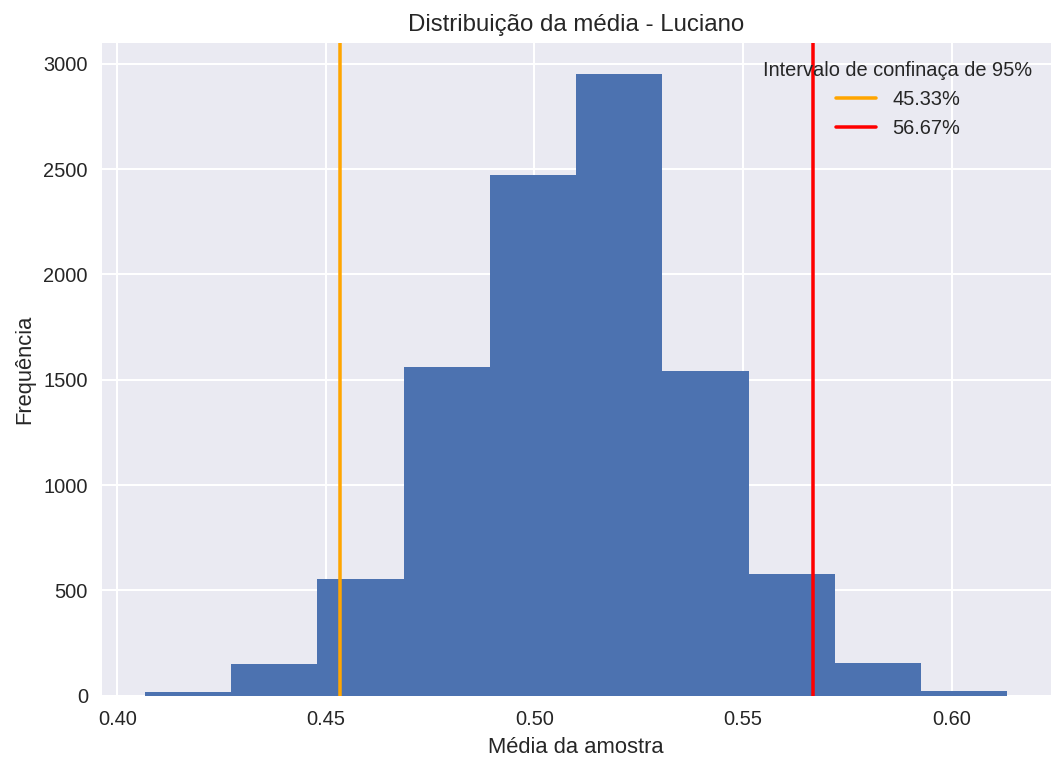

In [24]:
participante_1_chart = ConfidenceIntervalChart(
    samples_participante_1,
    95,
    participantes_paredao[0]
)

participante_1_chart.plot()

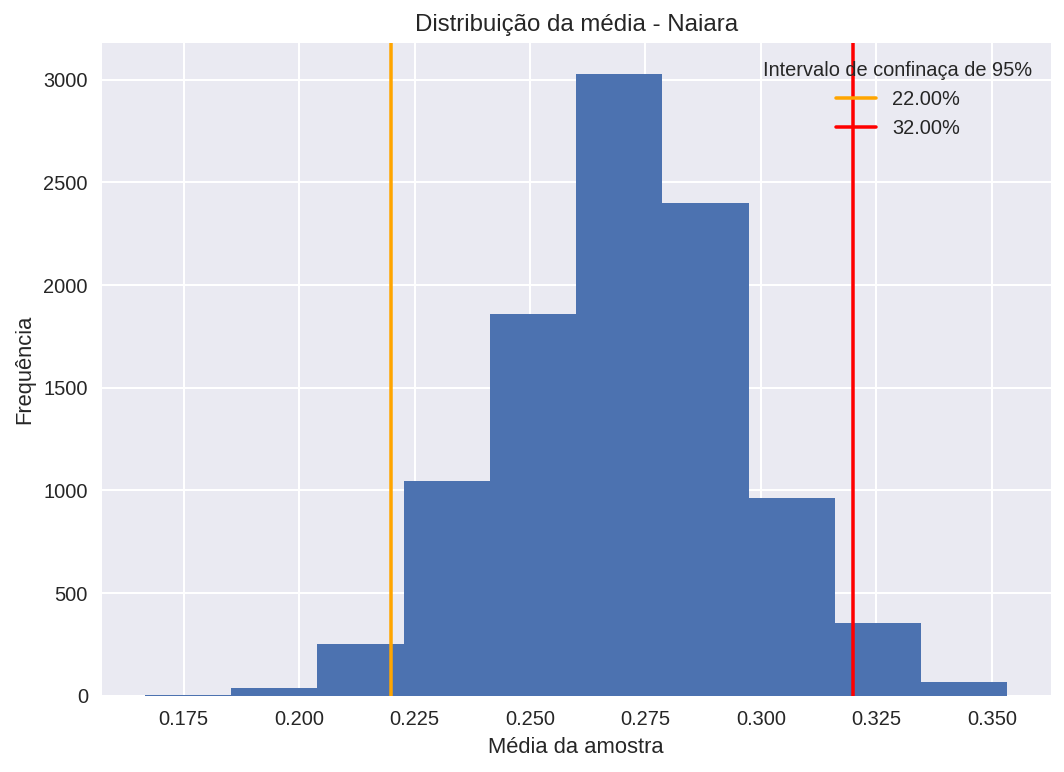

In [25]:
participante_2_chart = ConfidenceIntervalChart(
    samples_participante_2,
    95,
    participantes_paredao[1]
)

participante_2_chart.plot()

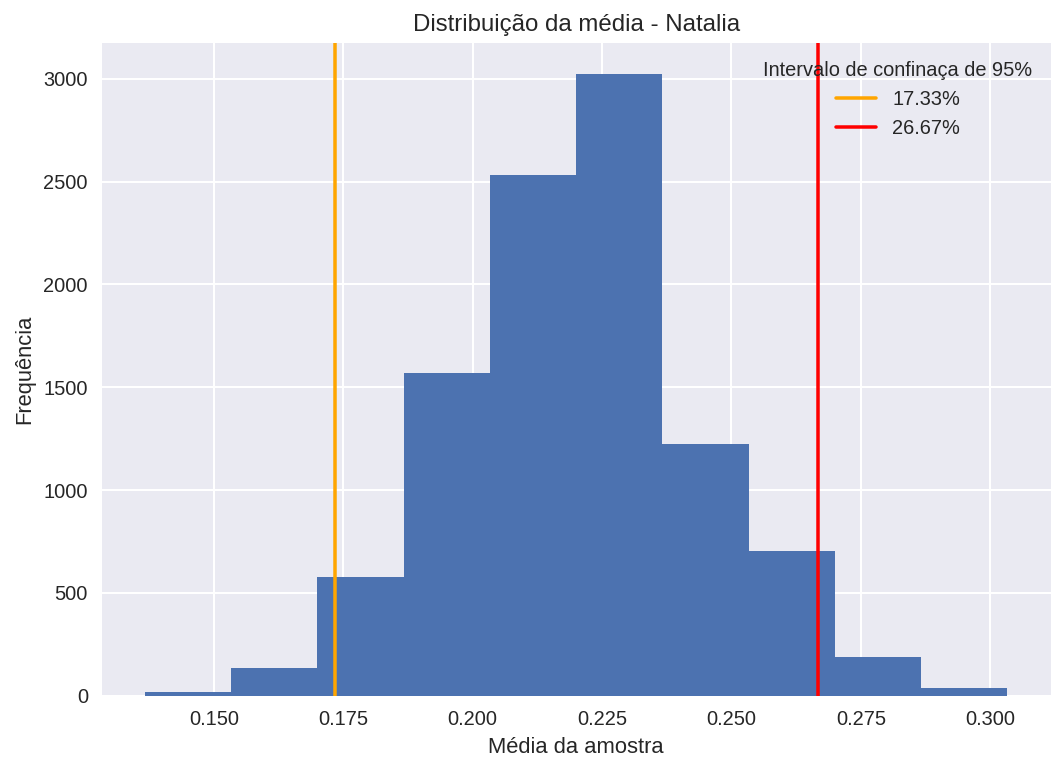

In [26]:
participante_3_chart = ConfidenceIntervalChart(
    samples_participante_3,
    95,
    participantes_paredao[2]
)

participante_3_chart.plot()